# Python Data Visualisation Libraries

## Matplotlib

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os
from sklearn.decomposition import PCA
import imageio

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 480x480 with 0 Axes>

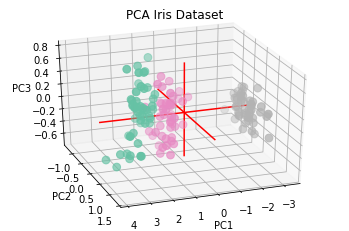

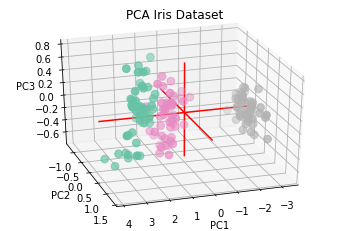

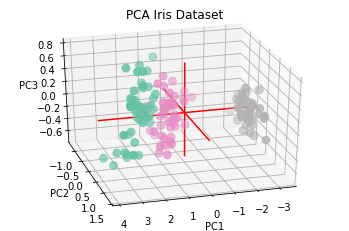

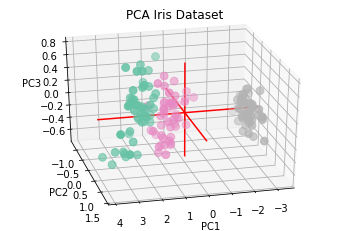

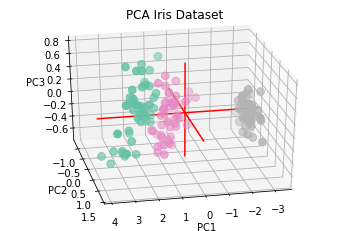

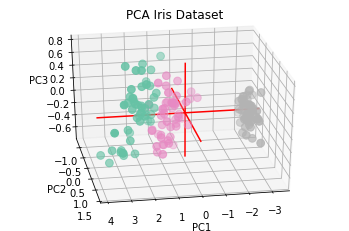

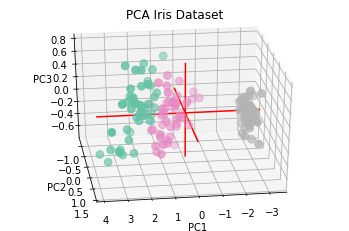

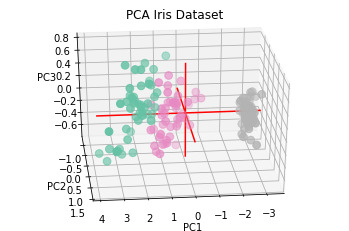

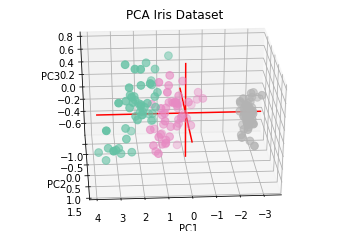

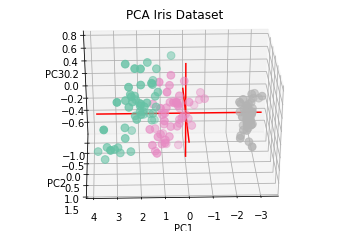

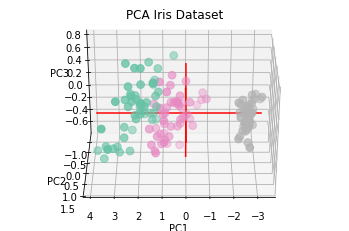

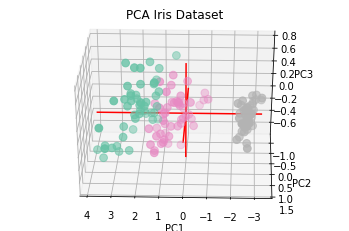

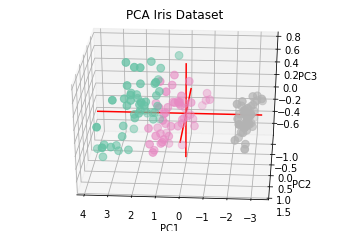

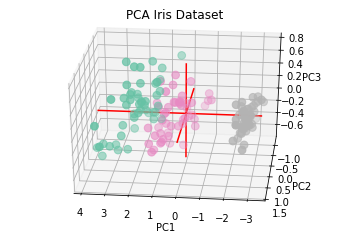

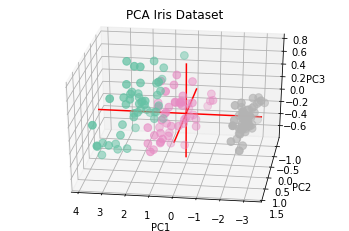

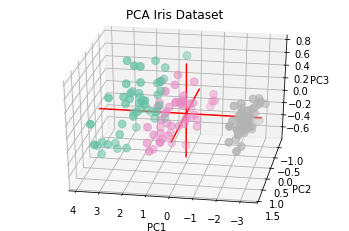

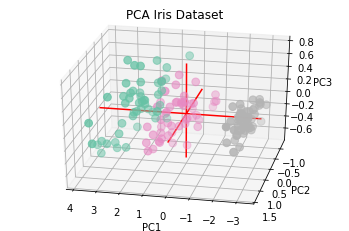

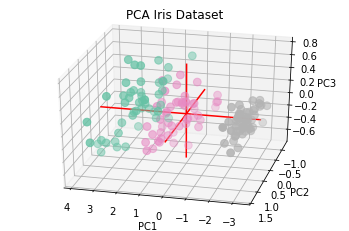

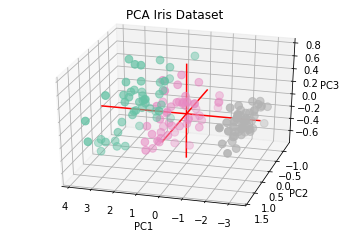

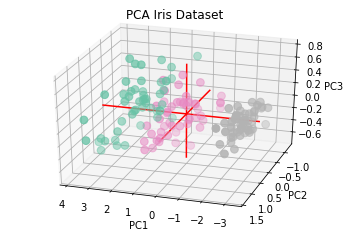

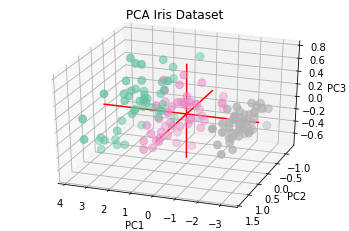

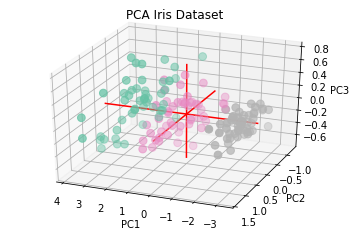

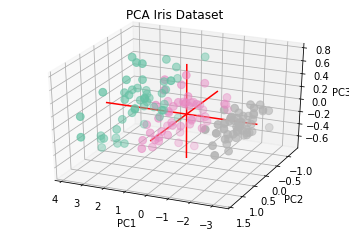

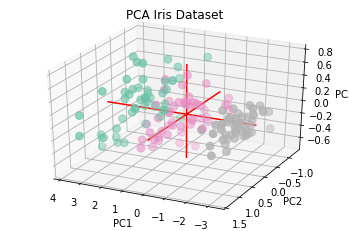

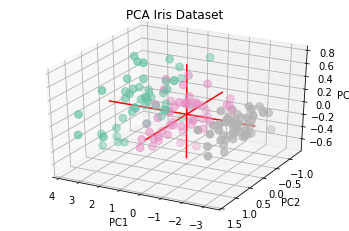

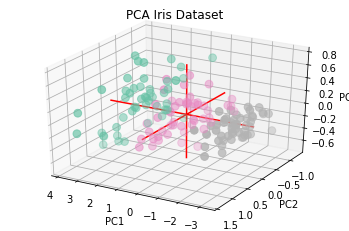

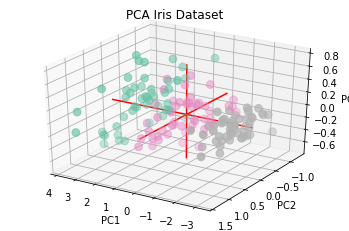

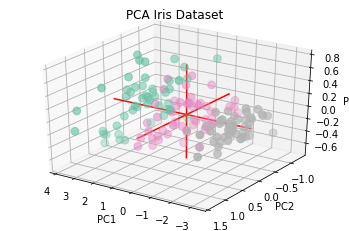

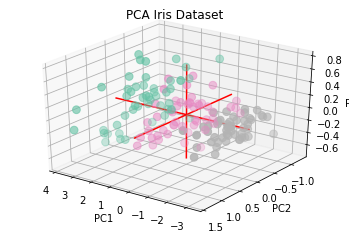

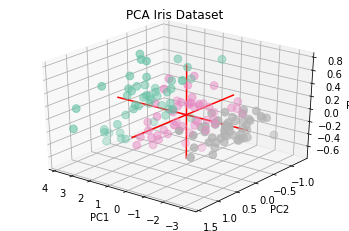

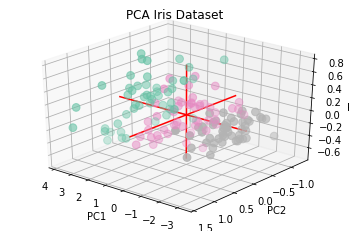

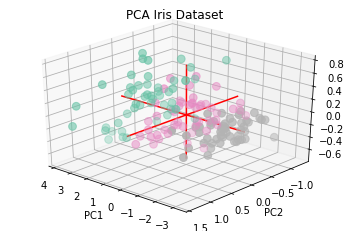

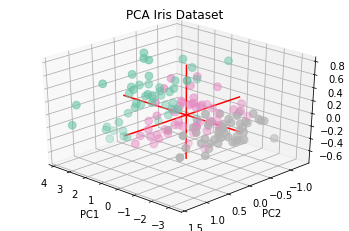

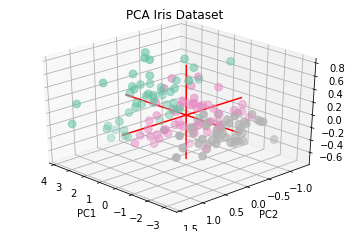

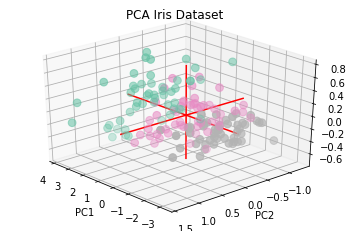

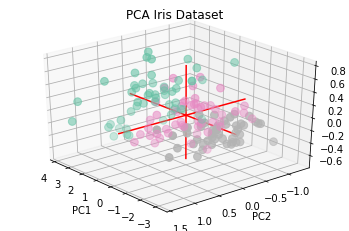

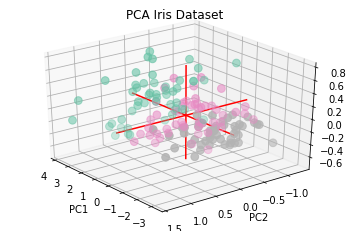

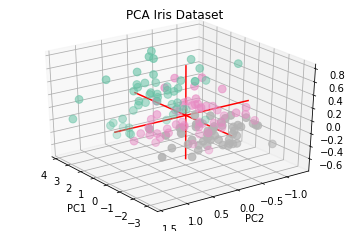

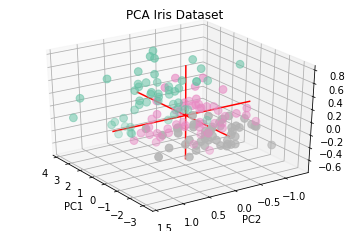

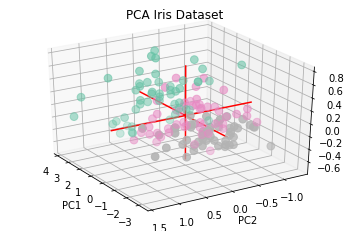

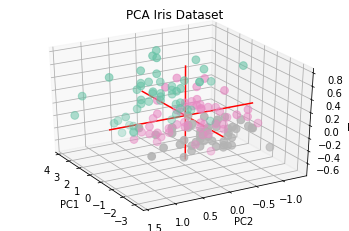

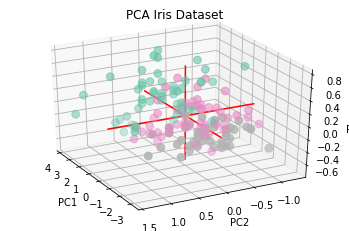

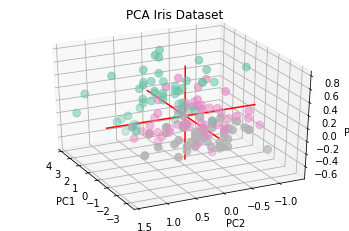

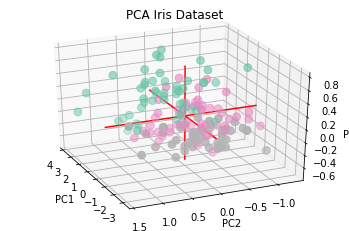

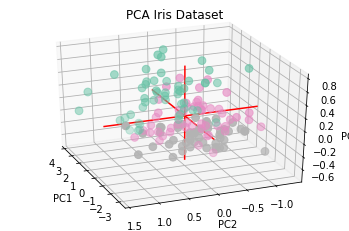

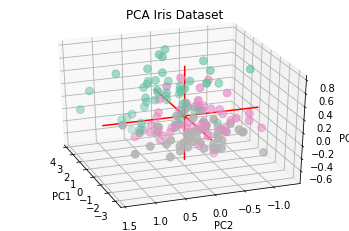

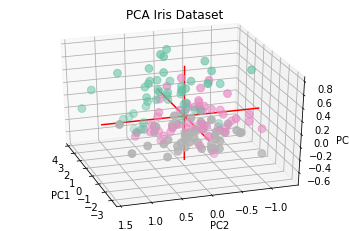

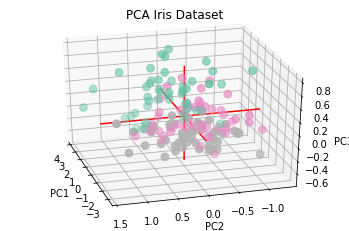

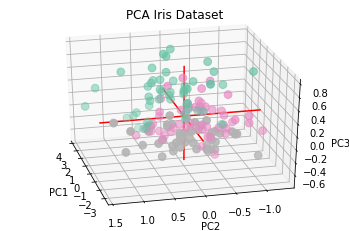

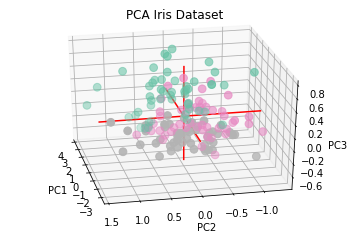

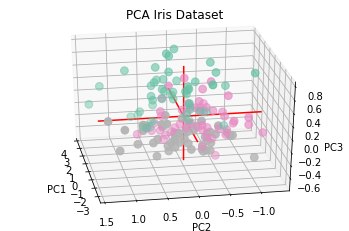

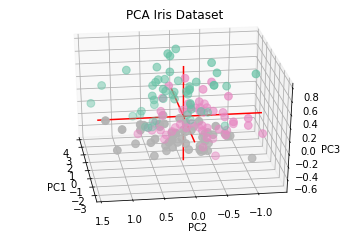

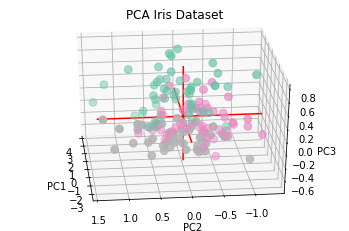

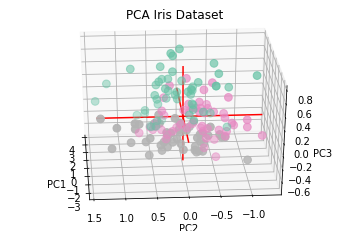

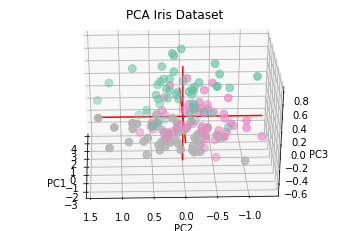

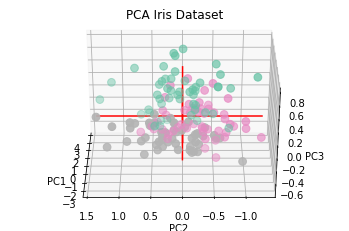

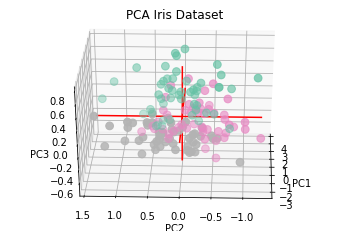

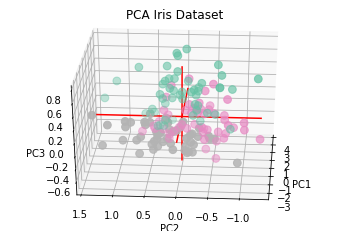

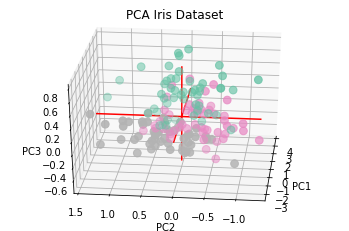

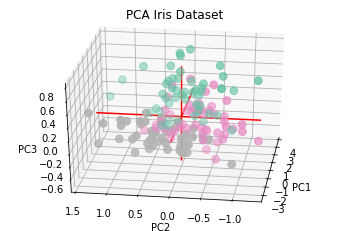

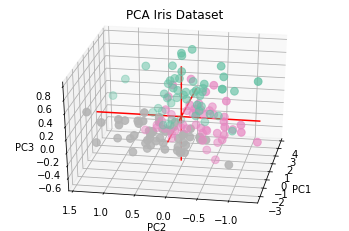

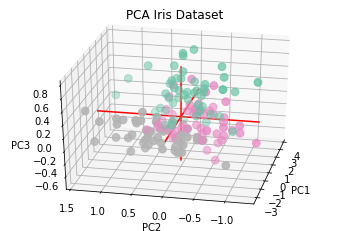

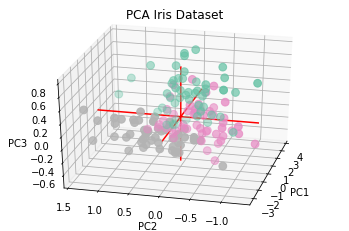

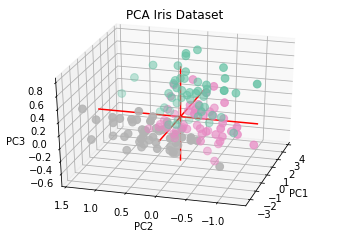

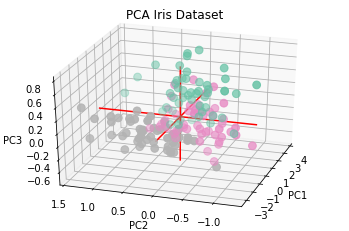

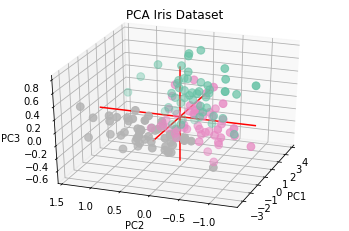

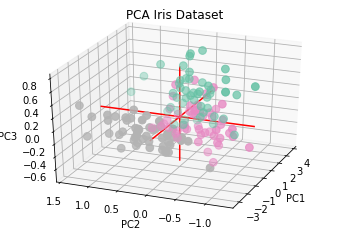

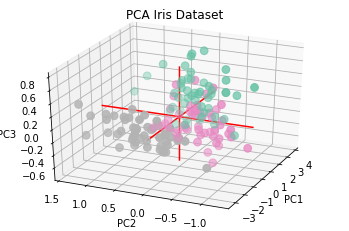

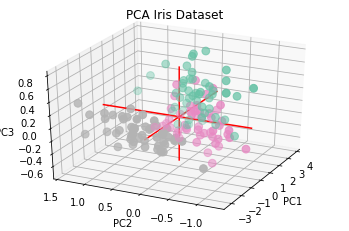

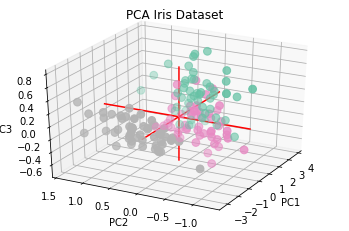

In [2]:
df = sns.load_dataset('iris')
 
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
 
# Keep the 'specie' column appart + make it numeric for coloring
df['species']=pd.Categorical(df['species'])
my_color=df['species'].cat.codes
df = df.drop('species', 1)
 
# Run The PCA
pca = PCA(n_components=3)
pca.fit(df)
 
# Store results of PCA in a data frame
result=pd.DataFrame(pca.transform(df), columns=['PCA%i' % i for i in range(3)], index=df.index)

# 20 plots, for 20 different angles
for angle in range(70,210,2):
    # Plot initialisation
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap="Set2_r", s=60)

    # make simple, bare axis lines through space:
    xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
    ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
    yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
    ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
    zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
    ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
    
    ax.view_init(30,angle)

    # label the axes
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.set_title("PCA Iris Dataset")
    filename='PCA/PCA_angle'+str(angle)+'.png'
    plt.savefig(filename, dpi=96)

In [3]:
def make_gif(input_folder, save_filepath):
    episode_frames = []
    time_per_step = 0.25
    for root, _, files in os.walk(input_folder):
        file_paths = [os.path.join(root, file) for file in files]
        #sorted by modified time
        file_paths = sorted(file_paths, key=lambda x: os.path.getmtime(x))
        episode_frames = [imageio.imread(file_path) for file_path in file_paths if file_path.endswith('.png')]
    episode_frames = np.array(episode_frames)
    imageio.mimsave(save_filepath, episode_frames, duration=time_per_step)

In [6]:
make_gif('./PCA/', './PCA/PCA.gif')

## Plotly

In [171]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.plotly as py
import plotly
import pandas as pd

In [92]:
df = pd.read_csv("TSLA.csv")

df['date'] = df['date'].astype('str') 
df['high'] = df['high'].astype('double')
df['low'] = df['low'].astype('double') 

import datetime

date2 = []
for i in df['date']:
    new_date = datetime.datetime.strptime(i, "%d/%m/%Y").strftime("%Y-%m-%d")
    date2.append(new_date)
    
df['date'] = df['date'].str.replace('/', '-')
df['date'] = date2
df.fillna(0)
df.head()
#df.dtypes

date   open     high    low  close    volume
0  2010-06-29  19.00  25.0000  17.54  23.89  18766300
1  2010-06-30  25.79  30.4192  23.30  23.83  17187100
2  2010-07-01  25.00  25.9200  20.27  21.96   8218800
3  2010-07-02  23.00  23.1000  18.71  19.20   5139800
4  2010-07-06  20.00  20.0000  15.83  16.11   6866900

In [172]:
trace_high = go.Scatter(
    x=df.date,
    y=df['high'],
    name = "TSLA High",
    line = dict(color = '#17BECF'),
    opacity = 0.8)

trace_low = go.Scatter(
    x=df.date,
    y=df['low'],
    name = "TSLA Low",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8)

data = [trace_high,trace_low]

layout = dict(
    title='Time Series with Rangeslider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")
plotly.offline.plot(fig, filename='Plotly_Stock.html')

'Plotly_Stock.html'

## Celluloid

In [7]:
from celluloid import Camera
import numpy as np
import matplotlib.pyplot as plt

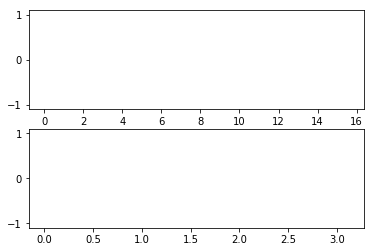

In [9]:
fig, axes = plt.subplots(2)
camera = Camera(fig)
t = np.linspace(0, 5 * np.pi, 128, endpoint=False)
t2 = np.linspace(0, 1 * np.pi, 128, endpoint=False)
for i in t2:
    axes[0].plot(t, np.cos(t/2 + i), color='b')
    axes[1].plot(t2, np.sin(t2 - i), color='b')
    camera.snap()
    
animation = camera.animate()  
animation.save('celluloid_example.gif', writer = 'imagemagick')

## Bokeh

In [106]:
import pandas as pd
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Viridis4

In [114]:
df = pd.read_csv("TSLA.csv")

df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

grouped = df.groupby('date')['high', 'low', 'open', 'close'].sum()

source = ColumnDataSource(grouped)

p = figure(x_axis_type='datetime')

p.line(x='date', y='high', line_width=2, source=source, color=Viridis4[0], legend='High Price')
p.line(x='date', y='low', line_width=2, source=source, color=Viridis4[1], legend='Low Price')
p.line(x='date', y='open', line_width=2, source=source, color=Viridis4[2], legend='Open Price')
p.line(x='date', y='close', line_width=2, source=source, color=Viridis4[3], legend='Close Price')

p.yaxis.axis_label = 'Price'
p.xaxis.axis_label = 'Time Span'

output_file('Tesla_Stock.html')
show(p)

In [163]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure
from bokeh.io import show
from bokeh.models import CustomJS
from bokeh.models.widgets import CheckboxGroup
from bokeh.layouts import row
from bokeh.palettes import Viridis4
from bokeh.models.annotations import Title

df = pd.read_csv("TSLA.csv")

df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

p = figure(x_axis_type='datetime', plot_width=800)
aline = p.line(df['date'], df['high'], line_width=2, color=Viridis4[0])
bline = p.line(df['date'], df['low'], line_width=2, color=Viridis4[1])
cline = p.line(df['date'], df['open'], line_width=2, color=Viridis4[2])
dline = p.line(df['date'], df['close'], line_width=2, color=Viridis4[3])

p.yaxis.axis_label = 'Price'
p.xaxis.axis_label = 'Time Span'

legend = Legend(items=[
    ("High Price",   [aline]),
    ("Low Price", [bline]),
    ("Open Price", [cline]),
    ("Close Price", [dline])
], location=(0, 450))

t = Title()
t.text = 'Tesla Stock Market Analysis'
p.title = t

p.add_layout(legend, 'left')

checkboxes = CheckboxGroup(labels=list(['High Price', 'Low Price', 'Open Price', 'Close Price']), active=[0, 1, 2, 3])
callback = CustomJS(code="""aline.visible = false; // aline and etc.. are 
                            bline.visible = false; // passed in from args
                            cline.visible = false; 
                            dline.visible = false;
                            // cb_obj is injected in thanks to the callback
                            if (cb_obj.active.includes(0)){aline.visible = true;} // 0 index box is aline
                            if (cb_obj.active.includes(1)){bline.visible = true;} // 1 index box is bline
                            if (cb_obj.active.includes(2)){cline.visible = true;} // 2 index box is cline etc...
                            if (cb_obj.active.includes(3)){dline.visible = true;}""",
                    args={'aline': aline, 'bline': bline, 'cline': cline, 'dline': dline})
checkboxes.js_on_click(callback)
show(row(p, checkboxes))
output_file('Tesla_Stock_Widget.html')

In [167]:
import jinja2
from bokeh.embed import components

# IMPORTANT NOTE!! The version of BokehJS loaded in the template should match 
# the version of Bokeh installed locally.

template = jinja2.Template("""
<!DOCTYPE html>
<html lang="en-US">

<link
    href="http://cdn.pydata.org/bokeh/dev/bokeh-0.13.0.min.css"
    rel="stylesheet" type="text/css"
>
<script 
    src="http://cdn.pydata.org/bokeh/dev/bokeh-0.13.0.min.js"
></script>

<body>

    <h1>Hello Everyone!</h1>
    
    <p> Here it is a simple example of Bokeh plot rendered in HTML! </p>
    
    {{ script }}
    
    {{ div }}

</body>

</html>
""")

In [168]:
df = pd.read_csv("TSLA.csv")

df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

p = figure(x_axis_type='datetime', plot_width=800)
aline = p.line(df['date'], df['high'], line_width=2, color=Viridis4[0])
bline = p.line(df['date'], df['low'], line_width=2, color=Viridis4[1])
cline = p.line(df['date'], df['open'], line_width=2, color=Viridis4[2])
dline = p.line(df['date'], df['close'], line_width=2, color=Viridis4[3])

p.yaxis.axis_label = 'Price'
p.xaxis.axis_label = 'Time Span'

legend = Legend(items=[
    ("High Price",   [aline]),
    ("Low Price", [bline]),
    ("Open Price", [cline]),
    ("Close Price", [dline])
], location=(0, 450))

t = Title()
t.text = 'Tesla Stock Market Analysis'
p.title = t

p.add_layout(legend, 'left')

checkboxes = CheckboxGroup(labels=list(['High Price', 'Low Price', 'Open Price', 'Close Price']), active=[0, 1, 2, 3])
callback = CustomJS(code="""aline.visible = false; // aline and etc.. are 
                            bline.visible = false; // passed in from args
                            cline.visible = false; 
                            dline.visible = false;
                            // cb_obj is injected in thanks to the callback
                            if (cb_obj.active.includes(0)){aline.visible = true;} // 0 index box is aline
                            if (cb_obj.active.includes(1)){bline.visible = true;} // 1 index box is bline
                            if (cb_obj.active.includes(2)){cline.visible = true;} // 2 index box is cline etc...
                            if (cb_obj.active.includes(3)){dline.visible = true;}""",
                    args={'aline': aline, 'bline': bline, 'cline': cline, 'dline': dline})
checkboxes.js_on_click(callback)

script, div = components(row(p, checkboxes))

In [169]:
from IPython.display import HTML
HTML(template.render(script=script, div=div))

## NBInteract

In [80]:
from ipywidgets import interact
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import nbinteract as nbi

In [81]:
def cars(name, number):
    return '{} has {} cars!'.format(name, number)

In [85]:
interact(cars, name='Nemo', number={'Zero': 0, 'Two': 2, 'Three': 3, 'Ten': 10});

interactive(children=(Text(value='Nemo', description='name'), Dropdown(description='number', options={'Zero': …